In [2]:
#source: https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

data = pd.read_csv('strokedata.csv',header='infer')


data['stroke'] = data['stroke'].replace([1],'yes')
data['stroke'] = data['stroke'].replace([0],'no')
data['gender'] = data['gender'].replace(['Male'],1)
data['gender'] = data['gender'].replace(['Female','Other'],0)
data['ever_married'] = data['ever_married'].replace(['Yes'],1)
data['ever_married'] = data['ever_married'].replace(['No'],0)
data['Residence_type'] = data['Residence_type'].replace(['Rural'],1)
data['Residence_type'] = data['Residence_type'].replace(['Urban'],0)
data['smoking_status'] = data['smoking_status'].replace(['never smoked','Unknown'],1)
data['smoking_status'] = data['smoking_status'].replace(['formerly smoked','smokes'],0)
data['bmi'] = data['bmi'].fillna(26.6)
newdata = data.drop(['work_type'],axis=1)

train, test = train_test_split(newdata, test_size=0.2, random_state=42, shuffle=True)

Y = train['stroke']
X = train.drop(['id','stroke'],axis=1)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20)
clf = clf.fit(X, Y)

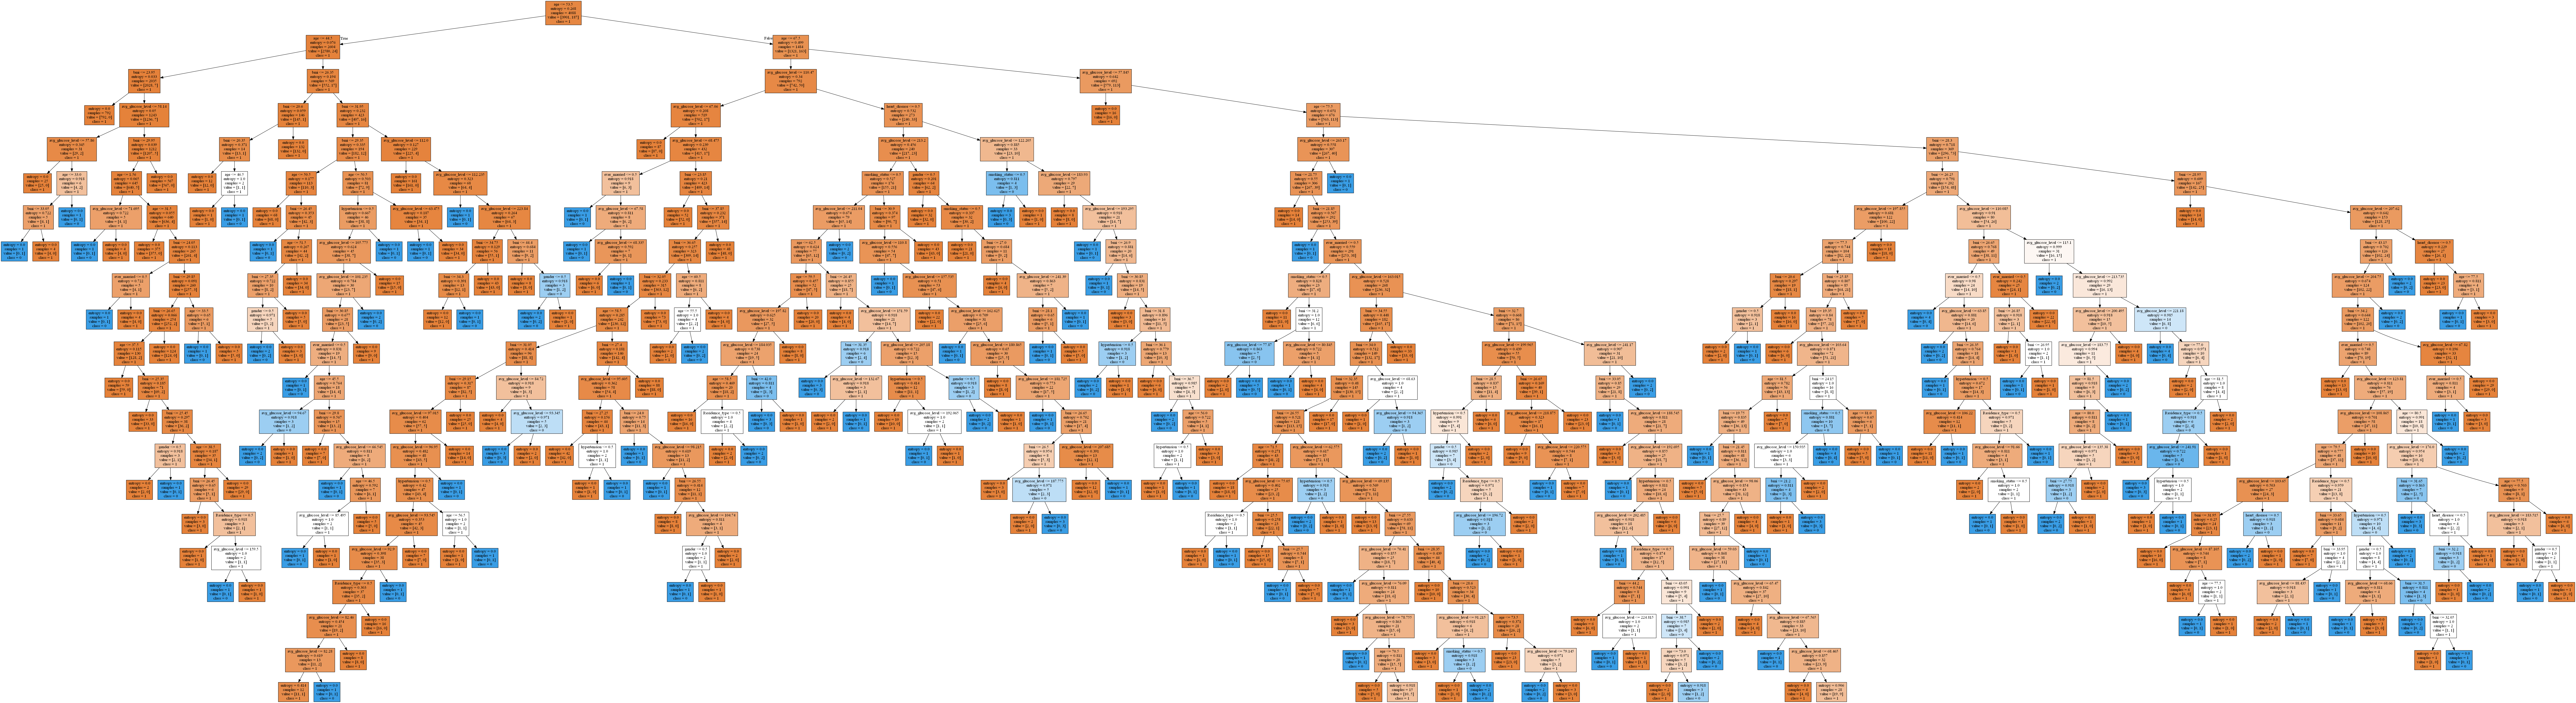

In [3]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1','0'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [4]:
testY = test['stroke']
testX = test.drop(['id','stroke'],axis=1)
pd.options.display.max_rows = 1000
predY = clf.predict(testX)


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,classification_report, confusion_matrix


print('f1 score on test data is %.2f' % (f1_score(testY, predY, pos_label = 'yes')))
print('recall score on test data is %.2f' % (recall_score(testY, predY, pos_label = 'yes')))
print(classification_report(testY,predY))
print(confusion_matrix(testY,predY))

f1 score on test data is 0.22
recall score on test data is 0.19
              precision    recall  f1-score   support

          no       0.95      0.96      0.96       960
         yes       0.26      0.19      0.22        62

    accuracy                           0.92      1022
   macro avg       0.60      0.58      0.59      1022
weighted avg       0.91      0.92      0.91      1022

[[925  35]
 [ 50  12]]
